In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
y = iris.target

df=pd.DataFrame(iris.data)
df["class"]=iris.target
df

,0,1,2,3,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


C:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


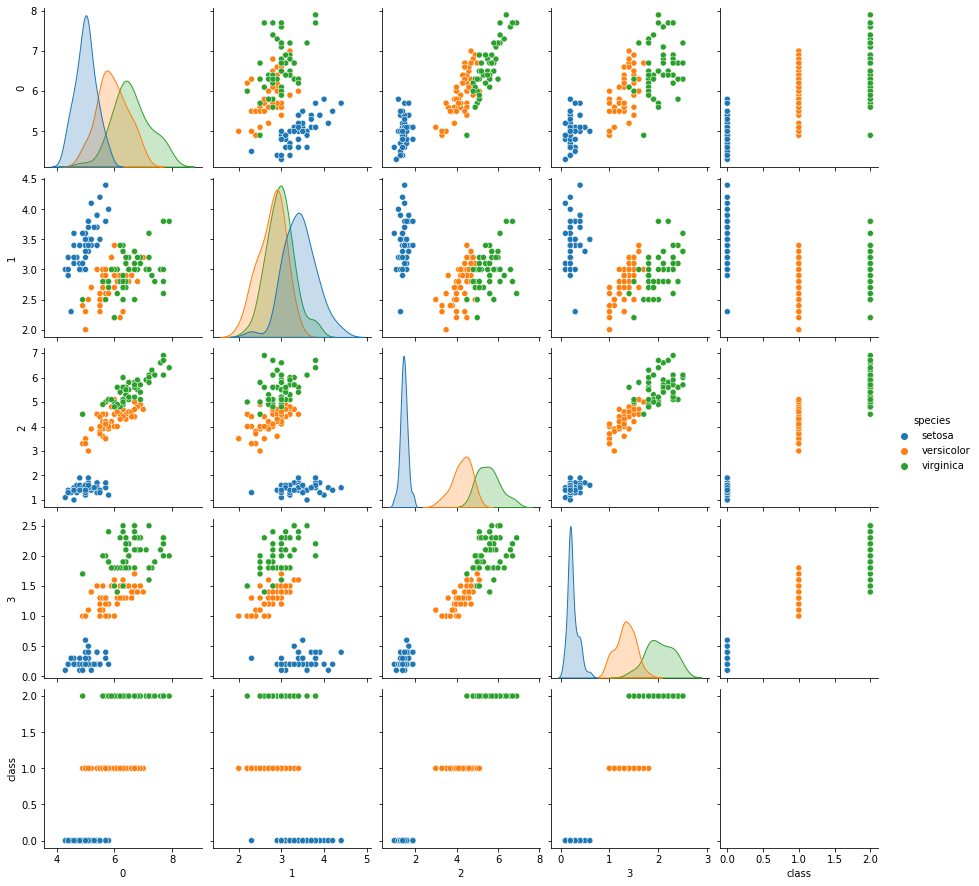

In [3]:
df['species'] = np.array([iris.target_names[i] for i in iris.target])
sns.pairplot(df, hue='species')

In [4]:
X_train,X_test, y_train, y_test=train_test_split(X,y,random_state=0,train_size=0.8)
clf_2= DecisionTreeClassifier(random_state=0,criterion="gini",splitter="random",max_depth=4,min_samples_leaf=5)
clf_2.fit(X_train,y_train)
y_predict=clf_2.predict(X_test)
metrics.accuracy_score(y_predict, y_test)

1.0

In [5]:
clf_1 = DecisionTreeClassifier(random_state=0,criterion="entropy")
clf_1.fit(X,y)

cross_val_score(clf_1, X, y, cv=5)

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [7]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(clf_1, X, y, target_name="target", feature_names=iris.feature_names,class_names=list(iris.target_names))

viz

ModuleNotFoundError: No module named 'dtreeviz'